<a href="https://colab.research.google.com/github/arianza1210/ComputerVision/blob/main/bismillah_Lenet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import PIL
import os
from PIL import Image, ImageOps
import glob
import cv2

In [ ]:
import os
print(os.listdir('/content/drive/MyDrive/Dataset CNN/Dataset ORI'))

['kupu_jojo', 'kupu_jarak', 'kupu_hijau_biru', 'kupu_raja_helena', 'kupu_pantat_merah', 'kupu_raja_limau', 'kupu_batik_cap', 'kupu_harimau_kuning_hijau']


In [ ]:
dataPath = '/content/drive/MyDrive/Dataset CNN/Dataset ORI'

In [3]:
import os, re, glob, cv2, numpy as np

dirs = os.listdir('/content/drive/MyDrive/Dataset CNN/Dataset')
label = 0
im_arr = []
lb_arr = []
X = []
y = []
for i in dirs: #loop all directory
    count = 0
    for pic in glob.glob('/content/drive/MyDrive/Dataset CNN/Dataset/'+i+'/*'):
        im = cv2.imread(pic)
        im = cv2.resize(im,(227,227))
        im = np.array(im)
        count = count + 1
        X.append(im)
        y.append(label)
        if(count <= 10):
            im_arr.append({str(i):im})
    print("Jumlah "+str(i)+" : "+str(count))
    label = label + 1
    lb_arr.append(i)
X = np.array(X)
y = np.array(y);

Jumlah kupu_raja_helena : 100
Jumlah kupu_pantat_merah : 95
Jumlah kupu_jojo : 100
Jumlah kupu_batik_cap : 100
Jumlah kupu_jarak : 100
Jumlah kupu_hijau_biru : 100
Jumlah kupu_harimau_kuning_hijau : 100
Jumlah kupu_raja_limau : 100


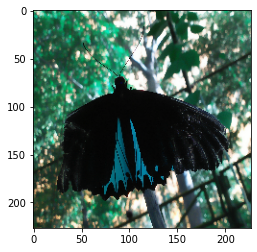

In [4]:
import matplotlib.pyplot as plt
plt.imshow(X[1])

In [5]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

X_train, X_other, y_train, y_other = train_test_split(X, y, train_size=0.70, random_state=42)
X_valid, X_test, y_valid, y_test = train_test_split(X_other, y_other, test_size=0.666, random_state=42)
X_train = X_train.astype('float32')
X_valid = X_valid.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_valid /= 255
X_test /= 255
y_train = to_categorical(y_train, len(dirs))
y_valid = to_categorical(y_valid, len(dirs))
y_test = to_categorical(y_test, len(dirs))
print("Found "+str(X_train.shape[0])+" trained image filenames belonging "+str(len(dirs))+" class")
print("Found "+str(X_valid.shape[0])+" validated image filenames belonging "+str(len(dirs))+" class")
print("Found "+str(X_test.shape[0])+" tested image filenames belonging "+str(len(dirs))+" class")

Found 556 trained image filenames belonging 8 class
Found 79 validated image filenames belonging 8 class
Found 160 tested image filenames belonging 8 class


In [48]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Activation, Dropout, Flatten, Dense

Lenet-5 arsitektur

In [49]:
model = Sequential() #model = sequential
model.add(Conv2D(32, kernel_size=(3, 3),activation='relu',input_shape=(227,227,3)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dropout(0.5))
model.add(Dense(128, activation='relu'))
model.add(Dense(8, activation='softmax'))
print(model.summary())

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 225, 225, 32)      896       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 112, 112, 32)     0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 110, 110, 64)      18496     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 55, 55, 64)       0         
 2D)                                                             
                                                                 
 dropout_4 (Dropout)         (None, 55, 55, 64)        0         
                                                                 
 flatten_2 (Flatten)         (None, 193600)           

In [51]:
from tensorflow.keras.optimizers import SGD
epochs = 50
lrate = 0.01
decay = lrate/epochs
sgd = SGD(lr=lrate, momentum=0.9, decay=decay, nesterov=False)
model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


In [52]:
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=epochs, batch_size=32)
scores = model.evaluate(X_test, y_test, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))

Epoch 1/50
18/18 [==============================] - 45s 2s/step - loss: 1.9053 - accuracy: 0.2428 - val_loss: 1.4508 - val_accuracy: 0.4875
Epoch 2/50
18/18 [==============================] - 43s 2s/step - loss: 1.0999 - accuracy: 0.6295 - val_loss: 1.4516 - val_accuracy: 0.5813
Epoch 3/50
18/18 [==============================] - 43s 2s/step - loss: 0.9563 - accuracy: 0.7212 - val_loss: 1.1474 - val_accuracy: 0.5938
Epoch 4/50
18/18 [==============================] - 42s 2s/step - loss: 0.8178 - accuracy: 0.7392 - val_loss: 0.9507 - val_accuracy: 0.6375
Epoch 5/50
18/18 [==============================] - 42s 2s/step - loss: 0.5180 - accuracy: 0.8453 - val_loss: 1.0484 - val_accuracy: 0.7750
Epoch 6/50
18/18 [==============================] - 42s 2s/step - loss: 0.4825 - accuracy: 0.8525 - val_loss: 1.4312 - val_accuracy: 0.6812
Epoch 7/50
18/18 [==============================] - 42s 2s/step - loss: 0.7101 - accuracy: 0.7968 - val_loss: 0.8356 - val_accuracy: 0.7875
Epoch 8/50
18/18 [==

In [53]:
# Evaluate accuracy
test_loss, test_acc = model.evaluate(X_test,  y_test, verbose=1)

print('\nTest accuracy:', test_acc)

5/5 [==============================] - 3s 596ms/step - loss: 0.4539 - accuracy: 0.9250

Test accuracy: 0.925000011920929


In [54]:
train_loss, train_acc = model.evaluate(X_train,  y_train, verbose=1)

print('\nTrain accuracy:', train_acc)

18/18 [==============================] - 11s 572ms/step - loss: 2.9695e-05 - accuracy: 1.0000

Train accuracy: 1.0


In [56]:
plt.clf()
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

<Figure size 432x288 with 0 Axes>

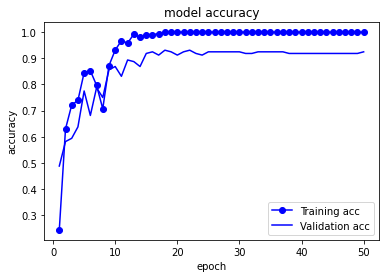

In [57]:
plot_epochs = range(1, len(acc)+1)
# Accuracy
plt.plot(plot_epochs, acc, 'bo-', label='Training acc')
plt.plot(plot_epochs, val_acc, 'b', label='Validation acc')
plt.title('model accuracy')
plt.ylabel('accuracy')  #Y-axis label
plt.xlabel('epoch')  #X-axis label
plt.legend()
plt.show()

In [58]:
loss = history.history['loss']
val_loss = history.history['val_loss']

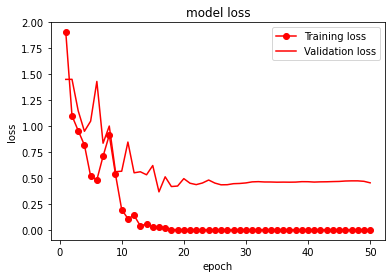

In [59]:
plot_epochs = range(1, len(loss)+1)
# Accuracy
plt.plot(plot_epochs, loss, 'ro-', label='Training loss')
plt.plot(plot_epochs, val_loss, 'r', label='Validation loss')
plt.title('model loss')
plt.ylabel('loss')  #Y-axis label
plt.xlabel('epoch')  #X-axis label
plt.legend()
plt.show()

In [60]:
y_pred = model.predict(X_test)

prediksi data test

In [61]:
y_prediction_n = []
y_test_n = []
for i in range(0, len(y_pred)):
  max_n = max(y_pred[i])
  max_m = max(y_test[i])
  index_n = [index_n for index_n, j in enumerate(y_pred[i]) if j == max_n]
  index_m = [index_m for index_m, j in enumerate(y_test[i]) if j == max_m]
  y_prediction_n.append(index_n)
  y_test_n.append(index_m)

In [62]:
from sklearn.metrics import classification_report
print(classification_report(y_test_n, y_prediction_n, 
                            target_names=["kupu_harimau_kuning_hijau",
                                          "kupu_raja_helena",
                                          "kupu_hijau_biru",
                                          "kupu_batik_cap",
                                          "kupu_jarak",
                                          "kupu_raja_limau",
                                          "kupu_jojo",
                                          "kupu_pantat_merah"]))

                           precision    recall  f1-score   support

kupu_harimau_kuning_hijau       1.00      0.88      0.94        26
         kupu_raja_helena       0.71      0.92      0.80        13
          kupu_hijau_biru       1.00      0.91      0.95        22
           kupu_batik_cap       1.00      0.91      0.95        22
               kupu_jarak       0.90      1.00      0.95        18
          kupu_raja_limau       1.00      0.95      0.98        22
                kupu_jojo       1.00      1.00      1.00        21
        kupu_pantat_merah       0.72      0.81      0.76        16

                 accuracy                           0.93       160
                macro avg       0.92      0.92      0.92       160
             weighted avg       0.94      0.93      0.93       160



In [63]:
y_pred = np.argmax(model.predict(X_test), axis=-1)
y_pred


array([6, 3, 7, 7, 0, 1, 2, 7, 6, 4, 5, 0, 7, 5, 0, 0, 3, 4, 5, 2, 0, 6,
       2, 2, 4, 2, 7, 6, 4, 3, 7, 1, 0, 6, 7, 0, 1, 3, 1, 1, 0, 0, 3, 2,
       5, 0, 3, 7, 6, 4, 7, 0, 0, 2, 1, 3, 1, 5, 0, 4, 6, 2, 4, 5, 4, 3,
       2, 5, 4, 5, 0, 4, 7, 2, 2, 0, 7, 3, 3, 0, 5, 5, 6, 5, 5, 0, 6, 0,
       6, 1, 4, 3, 4, 1, 7, 0, 5, 2, 4, 5, 6, 2, 2, 5, 4, 6, 7, 6, 0, 5,
       4, 1, 2, 2, 1, 3, 3, 7, 3, 0, 6, 4, 4, 6, 2, 5, 1, 6, 2, 2, 3, 1,
       0, 1, 5, 7, 6, 6, 7, 0, 3, 5, 2, 1, 5, 4, 1, 7, 7, 4, 3, 1, 3, 3,
       4, 6, 6, 6, 5, 3])

In [64]:
y_test_class = np.argmax(y_test, axis=1)

In [65]:
from sklearn.metrics import confusion_matrix, accuracy_score
import seaborn as sn
print(accuracy_score(y_test_class, y_pred))
confusion_matrix(y_test_class, y_pred)

0.925


array([[23,  0,  0,  0,  0,  0,  0,  3],
       [ 0, 12,  0,  0,  0,  0,  0,  1],
       [ 0,  1, 20,  0,  0,  0,  0,  1],
       [ 0,  0,  0, 20,  2,  0,  0,  0],
       [ 0,  0,  0,  0, 18,  0,  0,  0],
       [ 0,  1,  0,  0,  0, 21,  0,  0],
       [ 0,  0,  0,  0,  0,  0, 21,  0],
       [ 0,  3,  0,  0,  0,  0,  0, 13]])

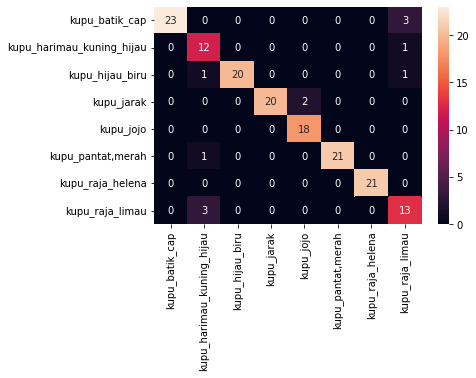

In [66]:
cm = confusion_matrix(y_test_class, y_pred)
sn.heatmap(cm, annot=True, xticklabels=["kupu_batik_cap",
                                          "kupu_harimau_kuning_hijau",
                                          "kupu_hijau_biru",
                                          "kupu_jarak",
                                          "kupu_jojo",
                                          "kupu_pantat,merah",
                                          "kupu_raja_helena",
                                          "kupu_raja_limau"], 
           yticklabels=["kupu_batik_cap",
                                          "kupu_harimau_kuning_hijau",
                                          "kupu_hijau_biru",
                                          "kupu_jarak",
                                          "kupu_jojo",
                                          "kupu_pantat,merah",
                                          "kupu_raja_helena",
                                          "kupu_raja_limau"])

prediksi data validasi


In [67]:
y_pred = model.predict(X_valid)
y_prediction_n = []
y_valid_n = []
for i in range(0, len(y_pred)):
  max_n = max(y_pred[i])
  max_m = max(y_valid[i])
  index_n = [index_n for index_n, j in enumerate(y_pred[i]) if j == max_n]
  index_m = [index_m for index_m, j in enumerate(y_valid[i]) if j == max_m]
  y_prediction_n.append(index_n)
  y_valid_n.append(index_m)

In [68]:
from sklearn.metrics import classification_report
print(classification_report(y_valid_n, y_prediction_n, target_names=["Kupu Batik Cap", 
                                                                     "Kupu Harimau Kuning Hijau", "Kupu Hijau Biru", 
                                                                     "Kupu Jarak", "Kupu Jojo", "Kupu Pantat Merah", 
                                                                     "Kupu Raja Helena", "Kupu Raja Limau"]))

                           precision    recall  f1-score   support

           Kupu Batik Cap       1.00      0.89      0.94         9
Kupu Harimau Kuning Hijau       0.79      1.00      0.88        11
          Kupu Hijau Biru       0.90      1.00      0.95         9
               Kupu Jarak       1.00      1.00      1.00        12
                Kupu Jojo       1.00      1.00      1.00        11
        Kupu Pantat Merah       1.00      1.00      1.00         6
         Kupu Raja Helena       1.00      1.00      1.00         8
          Kupu Raja Limau       1.00      0.77      0.87        13

                 accuracy                           0.95        79
                macro avg       0.96      0.96      0.95        79
             weighted avg       0.96      0.95      0.95        79

